In [1]:
import numpy as np
import networkx as nx

In [2]:
# Matriz de custo:
cij = np.array([[0, 3, 4, 0, 0, 0],
                [3, 0, 8, 7, 0, 0],
                [4, 8, 0, 7, 4, 3],
                [0, 7, 7, 0, 1, 0],
                [0, 0, 4, 1, 0, 2],
                [0, 0, 3, 0, 2, 0]])

In [3]:
# Matriz de adjacencias:
aij = np.where(cij > 0, 1, cij)
aij

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 1, 0, 0],
       [1, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 1, 0],
       [0, 0, 1, 1, 0, 1],
       [0, 0, 1, 0, 1, 0]])

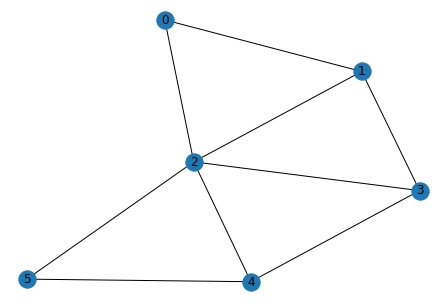

In [4]:
adj_matriz = nx.from_numpy_matrix(aij)
nx.draw(adj_matriz, with_labels=True) 

In [5]:
# Matriz de custos de Floyd:
cij_floyd = np.where(cij == 0, float('inf'), cij)
np.fill_diagonal(cij_floyd, 0)
cij_floyd

array([[ 0.,  3.,  4., inf, inf, inf],
       [ 3.,  0.,  8.,  7., inf, inf],
       [ 4.,  8.,  0.,  7.,  4.,  3.],
       [inf,  7.,  7.,  0.,  1., inf],
       [inf, inf,  4.,  1.,  0.,  2.],
       [inf, inf,  3., inf,  2.,  0.]])

In [6]:
# Matriz de trajetos de Floyd:
n = len(cij)

tij = cij_floyd.copy()
for i in range(n):
    tij[i,:] = i
    
tij

array([[0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1.],
       [2., 2., 2., 2., 2., 2.],
       [3., 3., 3., 3., 3., 3.],
       [4., 4., 4., 4., 4., 4.],
       [5., 5., 5., 5., 5., 5.]])

In [7]:
# Algoritmo de Floyd:
for k in range(n):
    for i in range(n):
        for j in range(n):
            if i != k and j != k:
                custo_ik_kj = cij_floyd[i][k] + cij_floyd[k][j]
                custo_ij = cij_floyd[i][j]
                if custo_ik_kj < custo_ij:
                    cij_floyd[i][j] = custo_ik_kj
                    tij[i][j] = tij[k][j]

In [8]:
cij_floyd

array([[ 0.,  3.,  4.,  9.,  8.,  7.],
       [ 3.,  0.,  7.,  7.,  8., 10.],
       [ 4.,  7.,  0.,  5.,  4.,  3.],
       [ 9.,  7.,  5.,  0.,  1.,  3.],
       [ 8.,  8.,  4.,  1.,  0.,  2.],
       [ 7., 10.,  3.,  3.,  2.,  0.]])

In [9]:
tij

array([[0., 0., 0., 4., 2., 2.],
       [1., 1., 0., 1., 3., 2.],
       [2., 0., 2., 4., 2., 2.],
       [2., 3., 4., 3., 3., 4.],
       [2., 3., 4., 4., 4., 4.],
       [2., 0., 5., 4., 5., 5.]])

In [10]:
# Identificar vétices com número ímpar de arestas:

n_arestas = []
for i in range(n):
    count = 0
    for j in range(n):
        if cij[i][j] > 0:
            count += 1
    n_arestas.append(count)


vertices_impares = []
for i in range(len(n_arestas)):
    if n_arestas[i] % 2 != 0:
        vertices_impares.append(i)
        
vertices_impares

[1, 2, 3, 4]

In [11]:
# Achar o matching: juntar os nós 2 a 2 minimizando o custo total:
vertices_verificados = []
arestas_selecionadas = []
custos_arestas = []

while len(vertices_verificados) < len(vertices_impares):
    menor_custo = float('inf')
    aresta_menor_custo = None
    vertices_menor_custo = None
    for vi in vertices_impares:
        if vi not in vertices_verificados:
            for vj in vertices_impares:
                if vj not in vertices_verificados:
                    if vi != vj:
                        custo = cij_floyd[vi][vj]
                        if custo < menor_custo:
                            menor_custo = custo
                            aresta_menor_custo = (vi,vj)
                            vertices_menor_custo = [vi,vj]    
    vertices_verificados += vertices_menor_custo
    arestas_selecionadas.append(aresta_menor_custo)
    custos_arestas.append(menor_custo)

In [12]:
arestas_selecionadas # matching escolhido

[(3, 4), (1, 2)]

In [13]:
custos_arestas

[1.0, 7.0]

In [14]:
# Recupera o trajeto pela matriz de trajetos de Floyd:
def recuperar_trajeto_floyd(no_inicial, no_final, tij):
    trajeto = []
    c = int(tij[no_inicial][no_final])
    while len(trajeto) < len(tij):
        if c != no_inicial:
            a = (no_inicial, c)
            trajeto.append(a)
            no_inicial = c
        else:
            a = (no_inicial, no_final)
            trajeto.append(a)
            no_inicial = c
            break
    return trajeto

In [15]:
# Recupera os trajetos e inclui as novas ligações na matriz de adjacência:
novas_arestas = []
for aresta in arestas_selecionadas:
    trajeto = recuperar_trajeto_floyd(aresta[0], aresta[1], tij)
    novas_arestas += trajeto

novas_arestas

[(3, 4), (1, 0), (0, 2)]

In [16]:
for aresta in novas_arestas:
    aij[aresta[0]][aresta[1]] += 1
    aij[aresta[1]][aresta[0]] += 1

In [17]:
aij

array([[0, 2, 2, 0, 0, 0],
       [2, 0, 1, 1, 0, 0],
       [2, 1, 0, 1, 1, 1],
       [0, 1, 1, 0, 2, 0],
       [0, 0, 1, 2, 0, 1],
       [0, 0, 1, 0, 1, 0]])

In [18]:
def obter_circuitos(aij):
    n = len(aij)
    circuitos = []
    for i in range(n):
        circuito = []
        loop = True
        while loop:
            for j in range(n):
                a = aij[i][j]
                if a > 0:
                    circuito.append((i,j))
                    aij[i][j] -= 1
                    aij[j][i] -= 1
                    break
            if a == 0:
                loop = False
                circuitos.append(circuito)
            i = j
        if sum(list(sum(aij))) == 0:
            break
    return circuitos

In [19]:
circuitos = obter_circuitos(aij)
circuitos

[[(0, 1), (1, 0), (0, 2), (2, 0)],
 [(1, 2), (2, 3), (3, 1)],
 [(2, 4), (4, 3), (3, 4), (4, 5), (5, 2)]]

In [30]:
# Montar circuito euleriano:
circuito_euleriano = []
for aresta in circuitos[0]:
    circuito_euleriano.append(aresta)
    for circuito in circuitos:
        if circuito != circuitos[0] and circuito[0][0] == aresta[1]:
            circuito_euleriano += circuito
circuito_euleriano

[(0, 1),
 (1, 2),
 (2, 3),
 (3, 1),
 (1, 0),
 (0, 2),
 (2, 4),
 (4, 3),
 (3, 4),
 (4, 5),
 (5, 2),
 (2, 0)]